# 1. Analyzing and preprocessing the movie review data

In [1]:
#We import all necessary modules from TensorFlow:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [2]:
# keras bult in IMDb dataset
# we set vocab size and keep only this many frequent words

vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [3]:
# print out training and testing data that was loaded

print('Number of training samples: ', len(y_train))
print('Number of positive samples:', sum(y_train))
print('Number of test samples:', len(y_test))

Number of training samples:  25000
Number of positive samples: 12500
Number of test samples: 25000


In [4]:
# print training sample
# each word represented by an integer and it's indicates frequency of the word

print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# use word dictionary to map integer to word

# retrieves the word dictionary used in the imdb dataset.
word_index = imdb.get_word_index() 

#creating a word dictinory using index word by itr through word index & swapping keys & values.
index_word = {index: word for word, index in word_index.items()}

#retrieves the first sample from training set and maps corresponding values.
print([index_word.get(i, ' ') for i in X_train[0]])  

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [6]:
# analyze length of each sample
# all input sequences to RNN must be of same length

review_lengths = [len(x) for x in X_train]

In [7]:
review_lengths

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

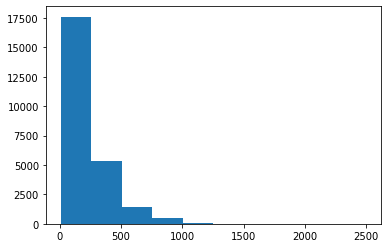

In [8]:
# plot distribution of document lengths

plt.hist(review_lengths, bins=10)
plt.show()

In [9]:
# majority of reviews around 200 words long
# set 200 as universal sequence length
# pad shorter reviews with zeros and cutting longer reviews
# use pad_sequences from keras in training and testing sets

maxlen = 200 ##maximum length of input sequences
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# print out input sequences
print('X_train shape after padding:', X_train.shape)
print('X_test shape after padding:', X_test.shape)

X_train shape after padding: (25000, 200)
X_test shape after padding: (25000, 200)


# 2. Developing a simple LSTM network

In [10]:
# training and testing datasets, building RNN.
# fix random seed and initiate keras sequential model

tf.random.set_seed(42)
model = models.Sequential()

In [11]:
# input sequences are encoded vectors
# need to be changed to dense vectors using embedding layer from keras
# input sequences made of vocab_size=5000 unique word tokens into
# dense vectors of size 32

embedding_size = 32
model.add(layers.Embedding(vocab_size, embedding_size))

In [12]:
# recurrent LSTM layer
# single layer with 50 nodes
# output layer with sigmoid activation function
# because binary classification
##Adds two layers into keras model

model.add(layers.LSTM(50)) ##LTSM-Long-Short_term-memory
model.add(layers.Dense(1, activation='sigmoid'))

# display model summary to double check layers
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# compile model with Adam optimizer
# use binary cross-entropy as optimaztion target

model.compile(loss='binary_crossentropy', ## common loss function for binary classification problems like sentiment analysis
              optimizer='adam', metrics=['accuracy'])

In [14]:
# train model with batches of 64 size for three epochs

batch_size = 64
n_epoch = 3
model.fit(X_train, y_train, batch_size=batch_size,
          epochs=n_epoch, validation_data=(X_test, y_test))

Epoch 1/3
391/391 [==============================] - 52s 127ms/step - loss: 0.4337 - accuracy: 0.7891 - val_loss: 0.3199 - val_accuracy: 0.8651
Epoch 2/3
391/391 [==============================] - 49s 125ms/step - loss: 0.2684 - accuracy: 0.8946 - val_loss: 0.3096 - val_accuracy: 0.8698
Epoch 3/3
391/391 [==============================] - 50s 128ms/step - loss: 0.2296 - accuracy: 0.9108 - val_loss: 0.3122 - val_accuracy: 0.8705


In [15]:
# evaluate classification accuracy on testing set
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy:', acc)

Test accuracy: 0.8704800009727478


# 3. Boosting the performance with multiple LSTM layers

In [16]:
# stack two recurrent layers
# new model and add embedding layer, two LSTM layers and output layer

model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_size))

# first layer returns sequences to feed output into second layer
# 20% dropout to both LSTM layers to reduce overfitting
# due to more parameters to train

model.add(layers.LSTM(50, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(50, dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
# print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, None, 50)          16600     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 196,851
Trainable params: 196,851
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
#Adam optimizer at a 0.003 learning rate:
optimizer = optimizers.Adam(learning_rate=0.003)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])

In [21]:
# train stacked model for 7 epochs
n_epoch = 7
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch,
          validation_data=(X_test, y_test))

Epoch 1/7
391/391 [==============================] - 130s 322ms/step - loss: 0.4837 - accuracy: 0.7682 - val_loss: 0.4354 - val_accuracy: 0.8219
Epoch 2/7
391/391 [==============================] - 126s 321ms/step - loss: 0.3613 - accuracy: 0.8499 - val_loss: 0.4001 - val_accuracy: 0.8344
Epoch 3/7
391/391 [==============================] - 121s 311ms/step - loss: 0.3119 - accuracy: 0.8722 - val_loss: 0.3291 - val_accuracy: 0.8646
Epoch 4/7
391/391 [==============================] - 123s 314ms/step - loss: 0.2824 - accuracy: 0.8876 - val_loss: 0.3926 - val_accuracy: 0.8410
Epoch 5/7
391/391 [==============================] - 126s 323ms/step - loss: 0.3392 - accuracy: 0.8561 - val_loss: 0.3310 - val_accuracy: 0.8610
Epoch 6/7
391/391 [==============================] - 124s 317ms/step - loss: 0.2252 - accuracy: 0.9112 - val_loss: 0.3118 - val_accuracy: 0.8702
Epoch 7/7
391/391 [==============================] - 123s 316ms/step - loss: 0.1915 - accuracy: 0.9262 - val_loss: 0.3549 - val_ac

#### Accuracy

In [22]:
# verify test accuracy
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy with stacked LSTM:', acc)

Test accuracy with stacked LSTM: 0.8615999817848206


#### Plotting the Leaning Curve

In [23]:
##Learning curve shows performance of the model useful for diagnosing underfitting and overfitting
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(0.1, 1.0, 5)):  ##axes=optional matplot axes used for plotting.
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, ## ML model
        X, ## Input feature for training and evaluation
        y, ## Input feature for training and evaluation
        cv=cv, ## optional cross - validation strategy
        n_jobs=n_jobs, ## No.of CPU cores used for parallelzing the cv process
        train_sizes=train_sizes, ## Array of float values used between 0 and 1, Specifies the proportion of the dataset. 
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()  ##hyperparemeters specified before training model
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, ## hyperparameter used for some alogorithms control regularization
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#### Plotting the Learning Curve using the logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

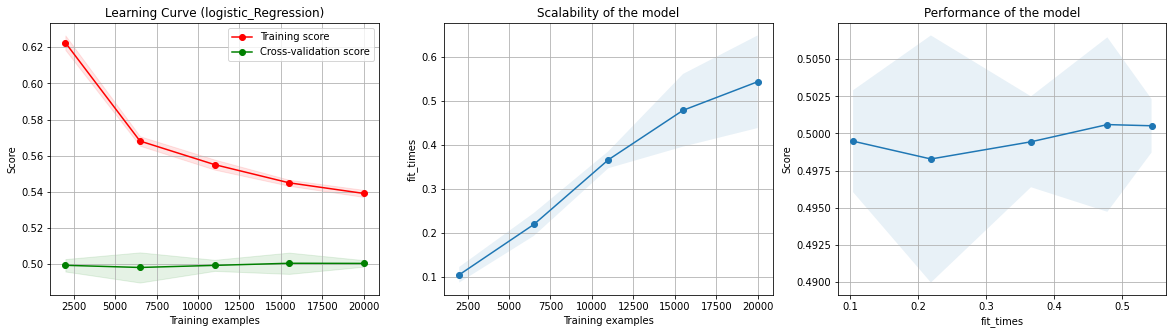

In [24]:
estimator = LogisticRegression()
title = "Learning Curve (logistic_Regression)"
X=X_train
y=y_train
cv = 5
n_jobs = -1
axes=None
ylim=(0,1)
train_sizes=np.linspace(0.1, 1.0, 5)
plot_learning_curve(estimator, title, X, y, axes=axes, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes)
plt.show()